In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11_tangram') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
# UMAP for vizualization
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
n_neighb = 15
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15)

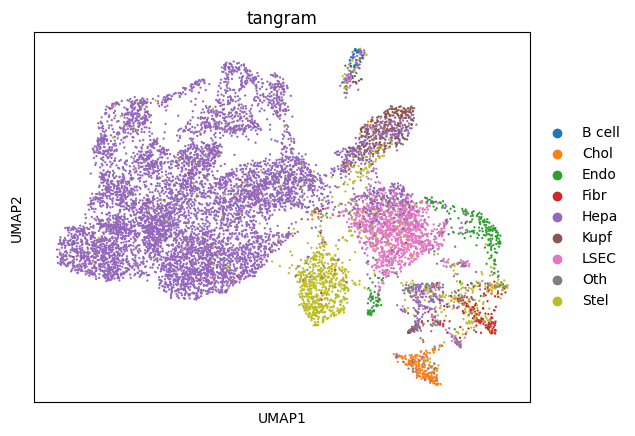

           atlas   tangram
B cell  0.006215  0.003473
Chol    0.026733  0.017991
Hepa    0.579985  0.690684
Oth     0.061609  0.017367
Kupf    0.032037  0.027075
Endo    0.032894  0.025917
LSEC    0.092414  0.106787
Fibr    0.030430  0.015141
Stel    0.137683  0.095565


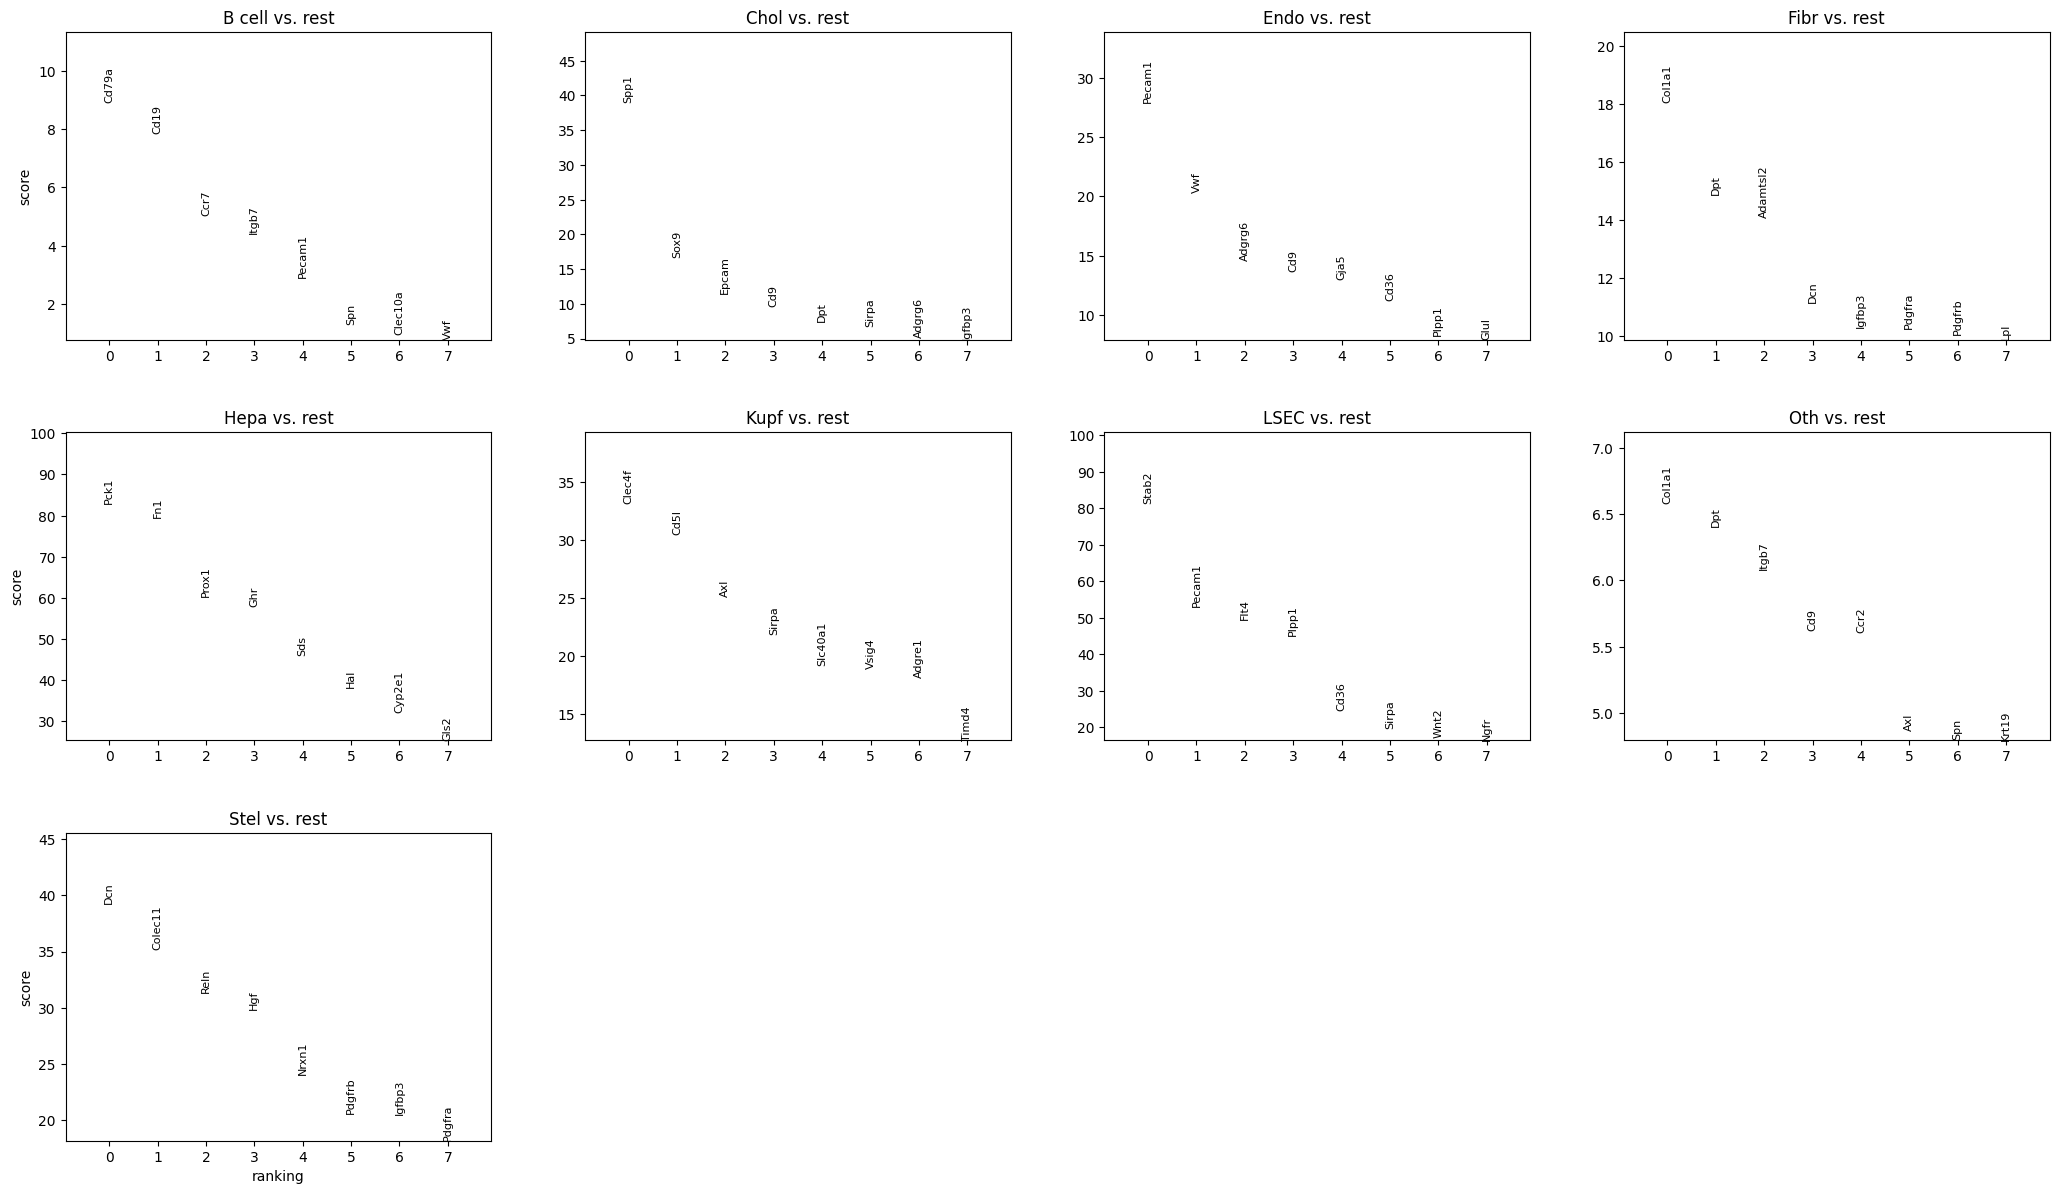

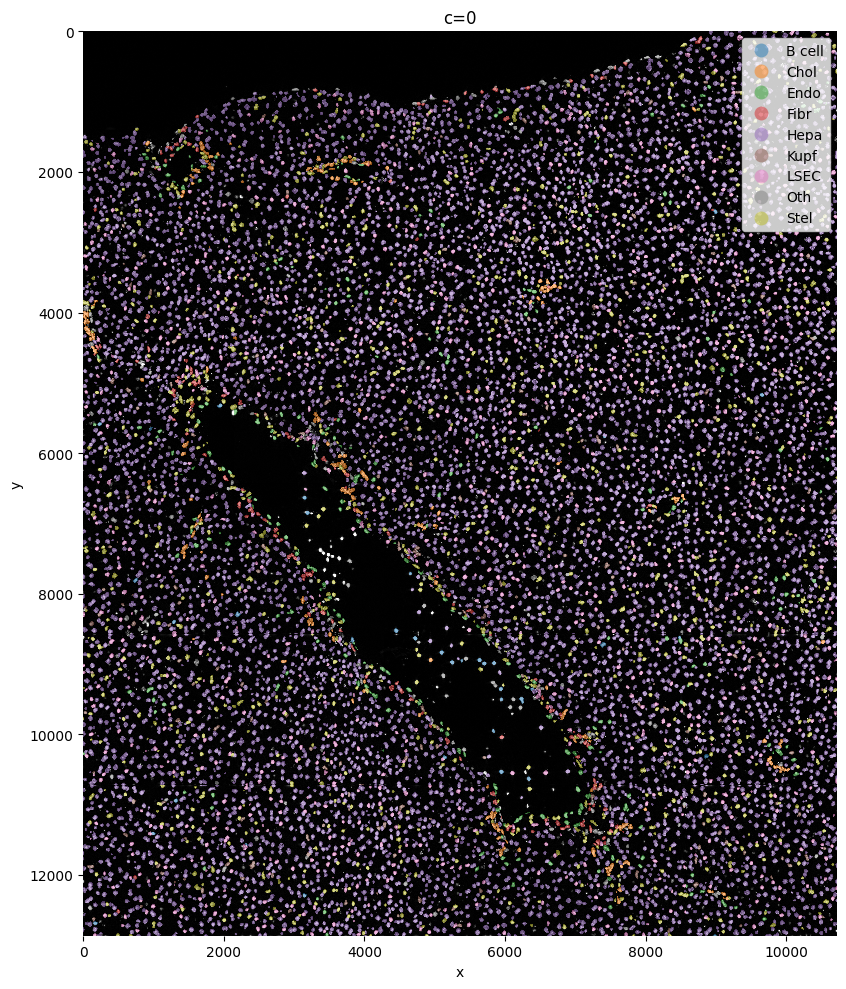

In [5]:
# Tangram cell mode
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'tangram','umap_23_15',path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=True,plot_image=True)

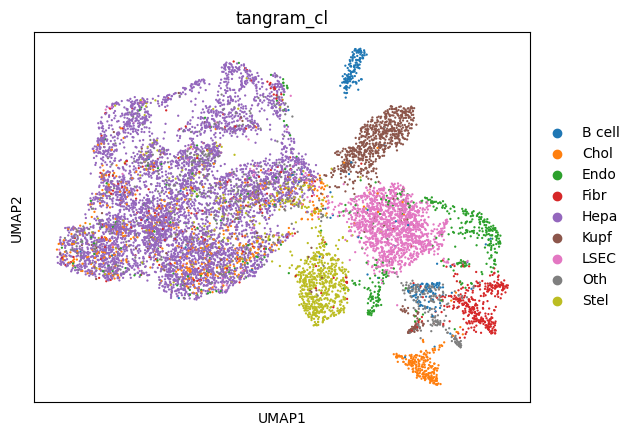

           atlas  tangram_cl
B cell  0.006215    0.024760
Chol    0.026733    0.065016
Hepa    0.579985    0.474973
Oth     0.061609    0.064749
Kupf    0.032037    0.071874
Endo    0.032894    0.045155
LSEC    0.092414    0.131813
Fibr    0.030430    0.047827
Stel    0.137683    0.073833


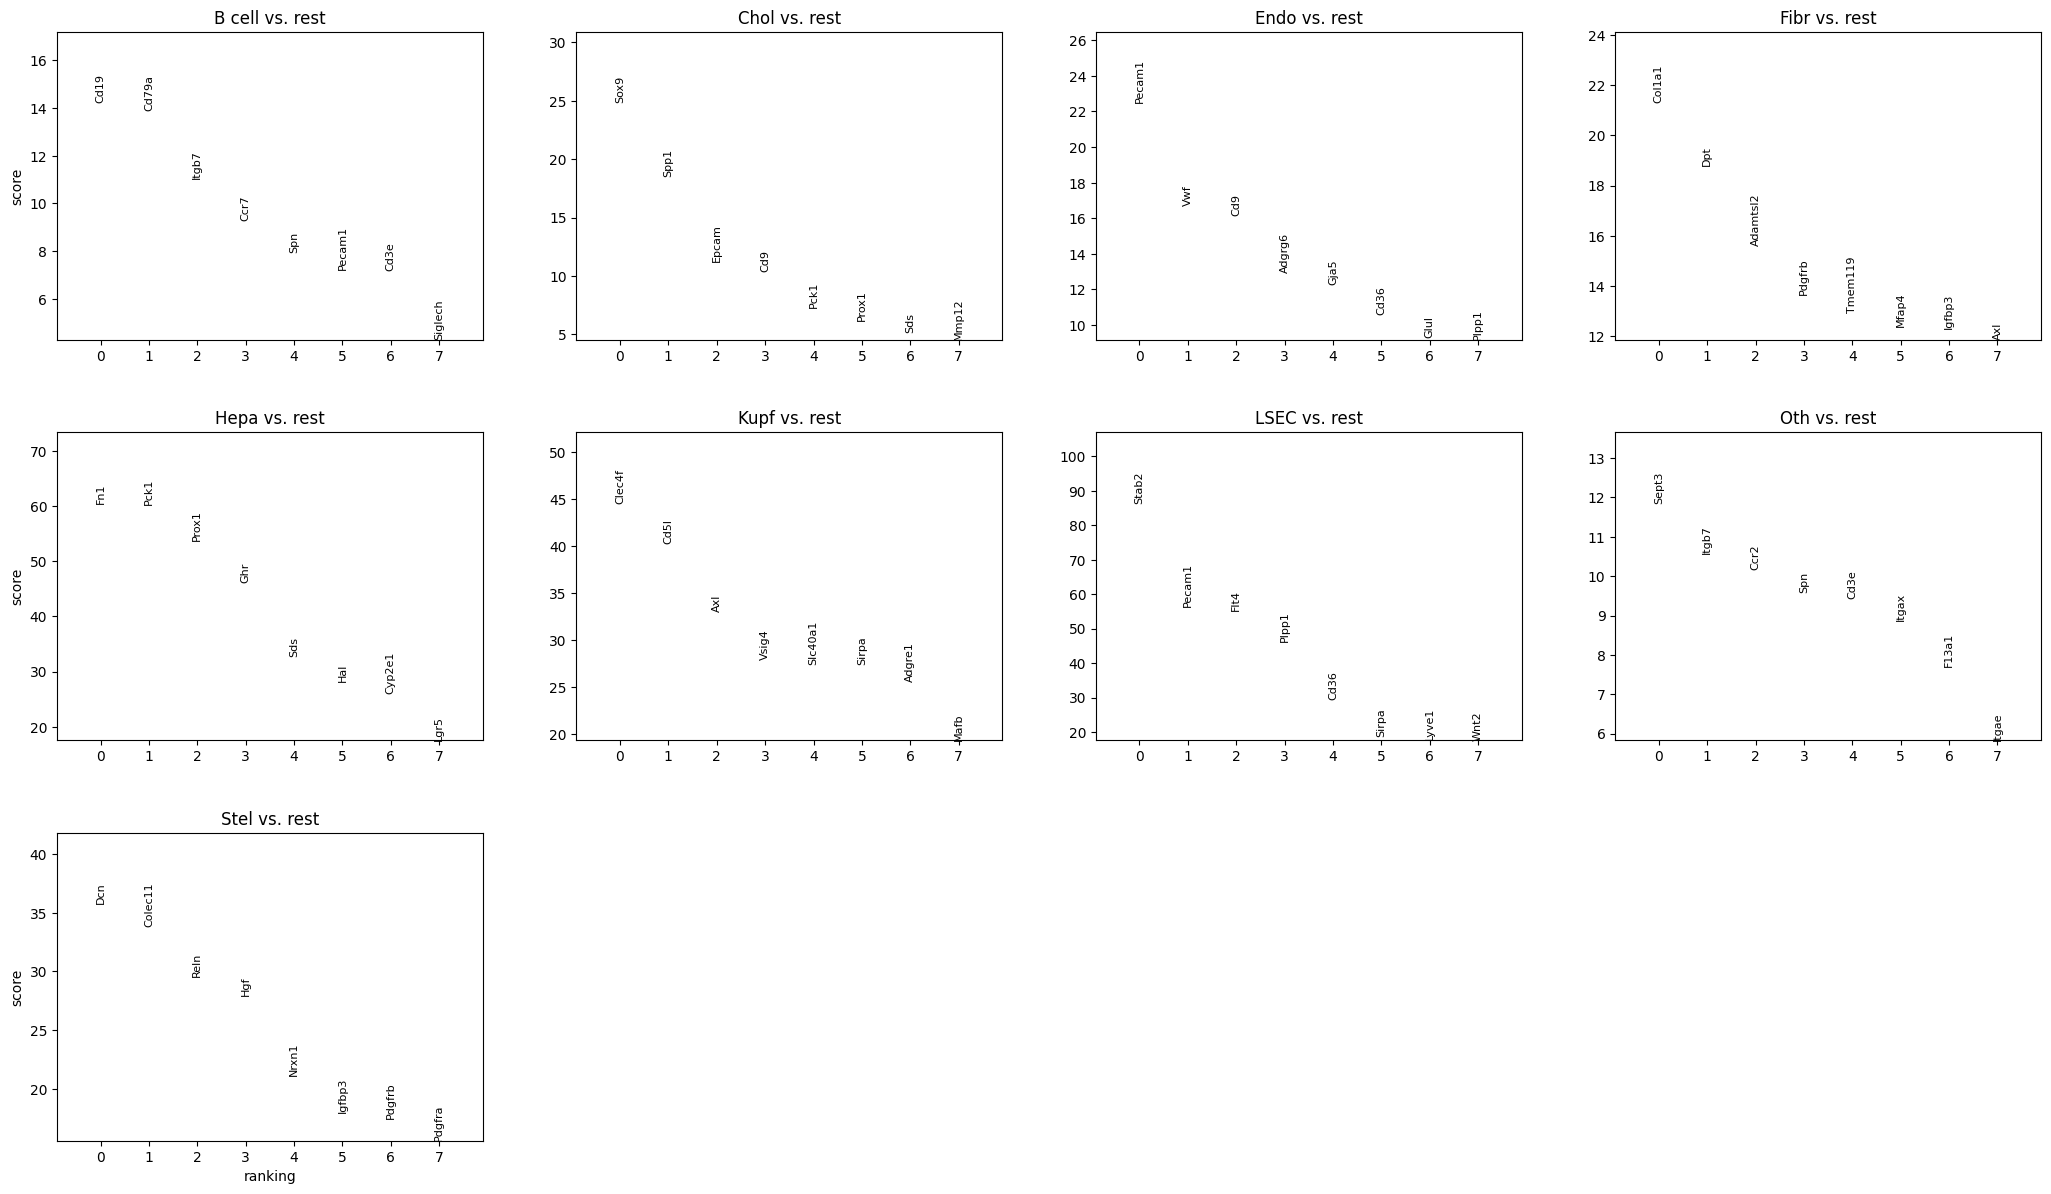

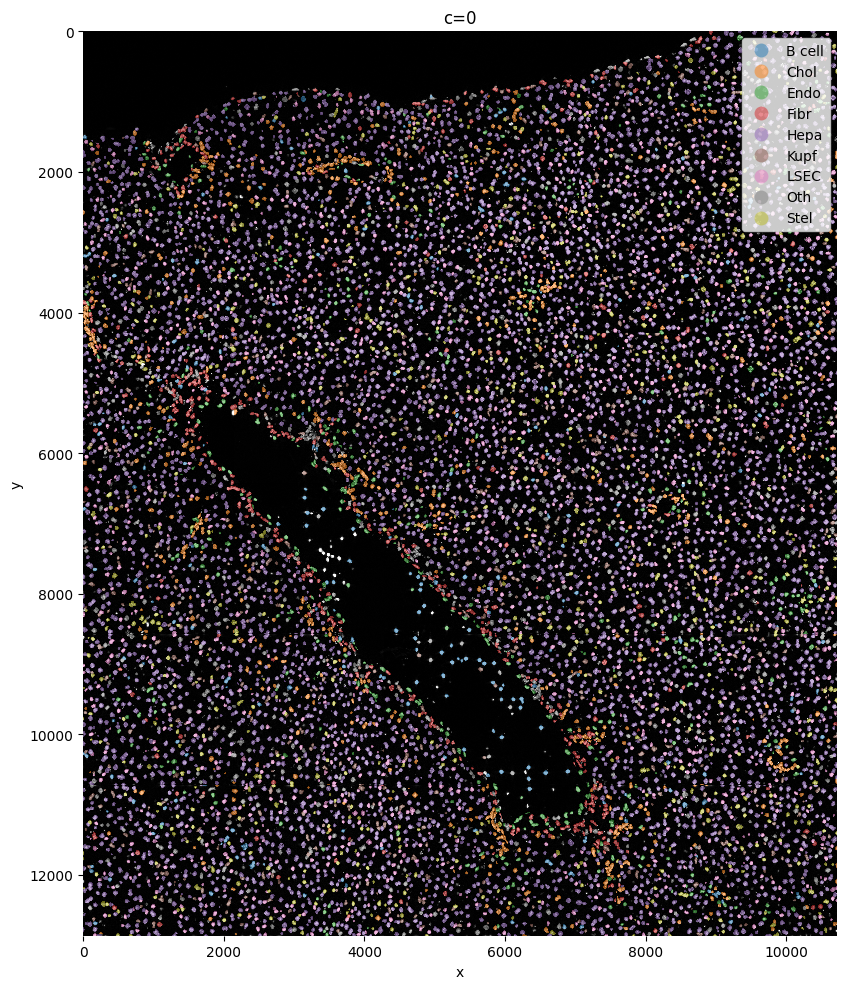

In [6]:
# Tangram cluster mode
visualize_classification(sdata,'tangram_cl','umap_23_15',path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=True,plot_image=True)